<a href="https://colab.research.google.com/github/adimyth/interesting_stuff/blob/master/object_detection/Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import csv
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import xml.etree.ElementTree as ET

In [0]:
from pprint import pprint

## Downloading Dataset

In [5]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2019-12-30 06:57:56--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  10.4MB/s    in 75s     

2019-12-30 06:59:12 (10.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



In [6]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2019-12-30 06:59:15--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  4.95MB/s    in 3.7s    

2019-12-30 06:59:20 (4.95 MB/s) - ‘annotations.tar.gz’ saved [19173078/19173078]



In [0]:
!tar xf images.tar.gz

In [0]:
!tar xf annotations.tar.gz

## Creating Dataset

In [0]:
!mv annotations/xmls/* images/

In [10]:
DATASET_FOLDER = "images/"
TRAIN_OUTPUT_FILE = "train.csv"
VALIDATION_OUTPUT_FILE = "validation.csv"

SPLIT_RATIO = 0.8

def main():
    if not os.path.exists(DATASET_FOLDER):
        print("Dataset not found")
        return

    class_names = {}
    k = 0
    output = []
    xml_files = glob.glob("{}/*xml".format(DATASET_FOLDER))
    for i, xml_file in enumerate(xml_files):
        tree = ET.parse(xml_file)

        path = os.path.join(DATASET_FOLDER, tree.findtext("./filename"))

        height = int(tree.findtext("./size/height"))
        width = int(tree.findtext("./size/width"))
        xmin = int(tree.findtext("./object/bndbox/xmin"))
        ymin = int(tree.findtext("./object/bndbox/ymin"))
        xmax = int(tree.findtext("./object/bndbox/xmax"))
        ymax = int(tree.findtext("./object/bndbox/ymax"))

        basename = os.path.basename(path)
        basename = os.path.splitext(basename)[0]
        class_name = basename[:basename.rfind("_")].lower()
        if class_name not in class_names:
            class_names[class_name] = k
            k += 1

        output.append((path, height, width, xmin, ymin, xmax, ymax, class_name, class_names[class_name]))

    # preserve percentage of samples for each class ("stratified")
    output.sort(key=lambda tup : tup[-1])

    lengths = []
    i = 0
    last = 0
    for j, row in enumerate(output):
        if last == row[-1]:
            i += 1
        else:
            print("class {}: {} images".format(output[j-1][-2], i))
            lengths.append(i)
            i = 1
            last += 1

    lengths.append(i)

    with open(TRAIN_OUTPUT_FILE, "w") as train, open(VALIDATION_OUTPUT_FILE, "w") as validate:
        writer = csv.writer(train, delimiter=",")
        writer2 = csv.writer(validate, delimiter=",")

        s = 0
        for c in lengths:
            for i in range(c):
                print("{}/{}".format(s + 1, sum(lengths)), end="\r")

                path, height, width, xmin, ymin, xmax, ymax, class_name, class_id = output[s]

                if xmin >= xmax or ymin >= ymax or xmax > width or ymax > height or xmin < 0 or ymin < 0:
                    print("Warning: {} contains invalid box. Skipped...".format(path))
                    continue

                row = [path, height, width, xmin, ymin, xmax, ymax, class_name, class_names[class_name]]
                if i <= c * SPLIT_RATIO:
                    writer.writerow(row)
                else:
                    writer2.writerow(row)

                s += 1

    print("\nDone!")

if __name__ == "__main__":
    main()

class leonberger: 100 images
class bengal: 98 images
class pug: 100 images
class beagle: 100 images
class yorkshire_terrier: 100 images
class ragdoll: 99 images
class english_cocker_spaniel: 100 images
class british_shorthair: 100 images
class shiba_inu: 100 images
class sphynx: 100 images
class staffordshire_bull_terrier: 100 images
class japanese_chin: 100 images
class maine_coon: 100 images
class keeshond: 100 images
class havanese: 100 images
class wheaten_terrier: 100 images
class chihuahua: 100 images
class pomeranian: 100 images
class persian: 100 images
class scottish_terrier: 100 images
class birman: 100 images
class russian_blue: 100 images
class american_bulldog: 100 images
class samoyed: 99 images
class basset_hound: 100 images
class boxer: 100 images
class english_setter: 100 images
class egyptian_mau: 92 images
class newfoundland: 100 images
class siamese: 100 images
class abyssinian: 99 images
class bombay: 100 images
class miniature_pinscher: 100 images
class saint_bern

In [11]:
!ls images | wc -l

11079


In [12]:
!ls images/*.mat | wc -l

3


In [13]:
!ls images/*.jpg | wc -l

7390


In [14]:
!ls images/*.mat

images/Abyssinian_100.mat  images/Abyssinian_101.mat  images/Abyssinian_102.mat


In [15]:
ls images/Abyssinian_100.mat | head 

images/Abyssinian_100.mat


What are these *mat* files?

In [0]:
!ls annotations/xmls | head

In [0]:
images_list = glob.glob("images/*.jpg")

In [0]:
images_list = [i.split("/")[1].split(".")[0] for i in images_list]

In [0]:
images_list = sorted(images_list)

In [20]:
len(images_list)

7390

In [0]:
xmls_list = glob.glob("images/*.xml")

In [0]:
xmls_list = [i.split("/")[1].split(".")[0] for i in xmls_list]

In [0]:
xmls_list = sorted(xmls_list)

In [24]:
len(xmls_list)

3686

In [25]:
print(f"Images: {images_list[:5]}\nXMLS: {xmls_list[:5]}")

Images: ['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102']
XMLS: ['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102']


In [0]:
overlap = set(images_list).intersection(set(xmls_list))

In [27]:
len(overlap)

3686

In [0]:
diff = set(images_list) - set(xmls_list)

In [29]:
len(diff)

3704

In [30]:
list(diff)[:5]

['yorkshire_terrier_77',
 'yorkshire_terrier_68',
 'Persian_87',
 'pug_43',
 'yorkshire_terrier_60']

In [31]:
list(overlap)[:5]

['american_pit_bull_terrier_154',
 'British_Shorthair_157',
 'scottish_terrier_164',
 'saint_bernard_16',
 'pomeranian_171']

**So, it looks like there's some issue with the dataset as we have a total of 7390 images but annotations only for 3686 images**

In [0]:
train = pd.read_csv('train.csv', header=None)
valid = pd.read_csv('validation.csv', header=None)

In [33]:
train.head()

,0,1,2,3,4,5,6,7,8
0,images/leonberger_108.jpg,462,500,25,4,495,411,leonberger,0
1,images/leonberger_152.jpg,500,388,39,43,339,359,leonberger,0
2,images/leonberger_118.jpg,333,500,147,42,380,271,leonberger,0
3,images/leonberger_11.jpg,334,500,164,123,208,160,leonberger,0
4,images/leonberger_173.jpg,334,500,114,12,267,150,leonberger,0


In [34]:
valid.head()

,0,1,2,3,4,5,6,7,8
0,images/leonberger_128.jpg,500,427,118,315,332,474,leonberger,0
1,images/leonberger_150.jpg,352,500,92,17,404,335,leonberger,0
2,images/leonberger_101.jpg,333,500,133,127,222,204,leonberger,0
3,images/leonberger_172.jpg,334,500,29,14,284,228,leonberger,0
4,images/leonberger_166.jpg,362,500,41,22,241,217,leonberger,0


In [35]:
train.shape

(2984, 9)

In [36]:
valid.shape

(702, 9)

In [37]:
bs = BeautifulSoup(open("images/Abyssinian_100.xml"), 'xml')
print(bs.prettify())

<?xml version="1.0" encoding="utf-8"?>
<annotation>
 <folder>
  OXIIIT
 </folder>
 <filename>
  Abyssinian_100.jpg
 </filename>
 <source>
  <database>
   OXFORD-IIIT Pet Dataset
  </database>
  <annotation>
   OXIIIT
  </annotation>
  <image>
   flickr
  </image>
 </source>
 <size>
  <width>
   394
  </width>
  <height>
   500
  </height>
  <depth>
   3
  </depth>
 </size>
 <segmented>
  0
 </segmented>
 <object>
  <name>
   cat
  </name>
  <pose>
   Frontal
  </pose>
  <truncated>
   0
  </truncated>
  <occluded>
   0
  </occluded>
  <bndbox>
   <xmin>
    151
   </xmin>
   <ymin>
    71
   </ymin>
   <xmax>
    335
   </xmax>
   <ymax>
    267
   </ymax>
  </bndbox>
  <difficult>
   0
  </difficult>
 </object>
</annotation>


In [0]:
!rm *.h5

## Training (Categorical CrossEntropy)

In [0]:
import csv
import math

from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape, Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import epsilon

# 0.35, 0.5, 0.75, 1.0
ALPHA = 0.35

# 96, 128, 160, 192, 224
IMAGE_SIZE = 96

EPOCHS = 30
BATCH_SIZE = 32
PATIENCE = 50

MULTI_PROCESSING = False
THREADS = 1

TRAIN_CSV = "train.csv"
VALIDATION_CSV = "validation.csv"

CLASSES = 37

class DataGenerator(Sequence):

    def __init__(self, csv_file):
        self.paths = []

        with open(csv_file, "r") as file:
            self.coords = np.zeros((sum(1 for line in file), 4 + CLASSES))
            file.seek(0)

            reader = csv.reader(file, delimiter=",")
            for index, row in enumerate(reader):
                for i, r in enumerate(row[1:7]):
                    row[i+1] = int(r)

                path, image_height, image_width, x0, y0, x1, y1, _, class_id = row
                self.coords[index, 0] = x0 * IMAGE_SIZE / image_width
                self.coords[index, 1] = y0 * IMAGE_SIZE / image_height
                self.coords[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width
                self.coords[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height 
                self.coords[index, min(4 + int(class_id), self.coords.shape[1]-1)] = 1

                self.paths.append(path)

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
            img = Image.open(f)
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
            img = img.convert('RGB')

            batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))
            img.close()

        return batch_images, [batch_coords[...,:4], batch_coords[...,4:]]

class Validation(Callback):
    def __init__(self, generator):
        self.generator = generator

    def on_epoch_end(self, epoch, logs):
        mse = 0
        accuracy = 0

        intersections = 0
        unions = 0

        for i in range(len(self.generator)):
            batch_images, (gt, class_id) = self.generator[i]
            pred, pred_class = self.model.predict_on_batch(batch_images)
            mse += np.linalg.norm(gt - pred, ord='fro') / pred.shape[0]

            pred_class = np.argmax(pred_class, axis=1)
            accuracy += np.sum(np.argmax(class_id, axis=1) == pred_class)

            pred = np.maximum(pred, 0)

            diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
            diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
            intersection = np.maximum(diff_width, 0) * np.maximum(diff_height, 0)

            area_gt = gt[:,2] * gt[:,3]
            area_pred = pred[:,2] * pred[:,3]
            union = np.maximum(area_gt + area_pred - intersection, 0)

            intersections += np.sum(intersection * (union > 0))
            unions += np.sum(union)

        iou = np.round(intersections / (unions + epsilon()), 4)
        logs["val_iou"] = iou

        mse = np.round(mse, 4)
        logs["val_mse"] = mse

        accuracy = np.round(accuracy / len(self.generator.coords), 4)
        logs["val_acc"] = accuracy

        print(" - val_iou: {} - val_mse: {} - val_acc: {}".format(iou, mse, accuracy))


def create_model(trainable=False):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)

    # to freeze layers
    for layer in model.layers:
        layer.trainable = trainable

    out = model.layers[-1].output

    x = Conv2D(4, kernel_size=3)(out)
    x = Reshape((4,), name="coords")(x)

    y = GlobalAveragePooling2D()(out)
    y = Dense(128, activation="relu")(y)
    y = Dense(64, activation="relu")(y)
    y = Dense(CLASSES, name="classes", activation="softmax")(y)

    return Model(inputs=model.input, outputs=[x, y])


def log_mse(y_true, y_pred):
    return tf.reduce_mean(input_tensor=tf.math.log1p(tf.math.squared_difference(y_pred, y_true)), axis=-1)

def train():
    model = create_model()

    train_datagen = DataGenerator(TRAIN_CSV)
    validation_datagen = Validation(generator=DataGenerator(VALIDATION_CSV))

    optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss={"coords" : log_mse, "classes" : 'categorical_crossentropy'}, optimizer=optimizer, metrics=[])
    checkpoint = ModelCheckpoint("model-{val_iou:.2f}_cat_entropy.h5", monitor="val_iou", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="max")
    stop = EarlyStopping(monitor="val_iou", patience=PATIENCE, mode="max")
    reduce_lr = ReduceLROnPlateau(monitor="val_iou", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")

    model.summary()

    model.fit_generator(generator=train_datagen,
                        epochs=EPOCHS,
                        callbacks=[validation_datagen, checkpoint, reduce_lr, stop],
                        workers=THREADS,
                        use_multiprocessing=MULTI_PROCESSING,
                        shuffle=True,
                        verbose=1)

In [52]:
train()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 16)   64          Conv1[0][0]                      
____________________________________________________________________________________________

## Testing

In [53]:
valid.head()

,0,1,2,3,4,5,6,7,8
0,images/leonberger_128.jpg,500,427,118,315,332,474,leonberger,0
1,images/leonberger_150.jpg,352,500,92,17,404,335,leonberger,0
2,images/leonberger_101.jpg,333,500,133,127,222,204,leonberger,0
3,images/leonberger_172.jpg,334,500,29,14,284,228,leonberger,0
4,images/leonberger_166.jpg,362,500,41,22,241,217,leonberger,0


In [0]:
mappings = {}
for i in range(0, 37):
  mappings[i] = valid.loc[valid[8]==i][7].unique()[0]

In [55]:
pprint(mappings)

{0: 'leonberger',
 1: 'bengal',
 2: 'pug',
 3: 'beagle',
 4: 'yorkshire_terrier',
 5: 'ragdoll',
 6: 'english_cocker_spaniel',
 7: 'british_shorthair',
 8: 'shiba_inu',
 9: 'sphynx',
 10: 'staffordshire_bull_terrier',
 11: 'japanese_chin',
 12: 'maine_coon',
 13: 'keeshond',
 14: 'havanese',
 15: 'wheaten_terrier',
 16: 'chihuahua',
 17: 'pomeranian',
 18: 'persian',
 19: 'scottish_terrier',
 20: 'birman',
 21: 'russian_blue',
 22: 'american_bulldog',
 23: 'samoyed',
 24: 'basset_hound',
 25: 'boxer',
 26: 'english_setter',
 27: 'egyptian_mau',
 28: 'newfoundland',
 29: 'siamese',
 30: 'abyssinian',
 31: 'bombay',
 32: 'miniature_pinscher',
 33: 'saint_bernard',
 34: 'american_pit_bull_terrier',
 35: 'german_shorthaired',
 36: 'great_pyrenees'}


In [0]:
import glob
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from keras.applications.mobilenet_v2 import preprocess_input


IMAGE_SIZE = 96

def predict(weights_file_path=None, n_samples=5):
    model = create_model()
    model.load_weights(weights_file_path)

    for idx, row in valid.sample(n_samples).iterrows():
        filename = row[0]
        unscaled = cv2.imread(filename)
        image_height, image_width, _ = unscaled.shape

        image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
        feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

        region, class_id = model.predict(x=np.array([feat_scaled]))
        # region = model.predict(x=np.array([feat_scaled]))[0]
        x0 = int(region[0][0] * image_width / IMAGE_SIZE)
        y0 = int(region[0][1] * image_height / IMAGE_SIZE)

        x1 = int((region[0][0] + region[0][2]) * image_width / IMAGE_SIZE)
        y1 = int((region[0][1] + region[0][3]) * image_height / IMAGE_SIZE)
        
        pred_class = mappings[np.argmax(class_id)]
        act_class = row[7]
        pred_prob = np.max(class_id, axis=1)

        cv2.rectangle(unscaled, (x0, y0), (x1, y1), (0, 0, 255), 1)

        # black = [0,0,0]
        # bordered_img = cv2.copyMakeBorder(unscaled, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=black)
        # violet = np.zeros((100, bordered_img.shape[1], 3), np.uint8)
        # violet[:] = (255, 0, 180)
        # vcat = cv2.vconcat((violet, bordered_img))
        # cv2.putText(vcat, f"Prediction: {pred_class}\n Probability: {100*pred_prob[0]:2.0f}%\n Actual: {str(act_class)}", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 2, cv2.LINE_AA)
        # cv2_imshow(vcat)

        print(f"Prediction: {pred_class}\nProbability: {100*pred_prob[0]:2.0f}%\nActual: {str(act_class)}")
        cv2_imshow(unscaled)
        print("\n\n")
        cv2.waitKey(0)
        cv2.destroyAllWindows()

### MultiClass Loss

Prediction: british_shorthair
Probability:  4%
Actual: miniature_pinscher


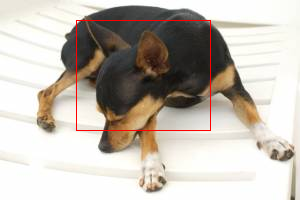




Prediction: english_setter
Probability:  6%
Actual: great_pyrenees


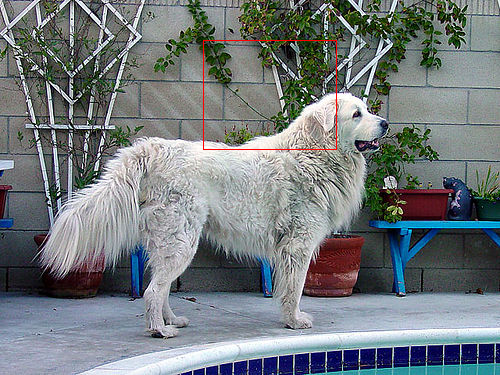




Prediction: wheaten_terrier
Probability:  6%
Actual: pug


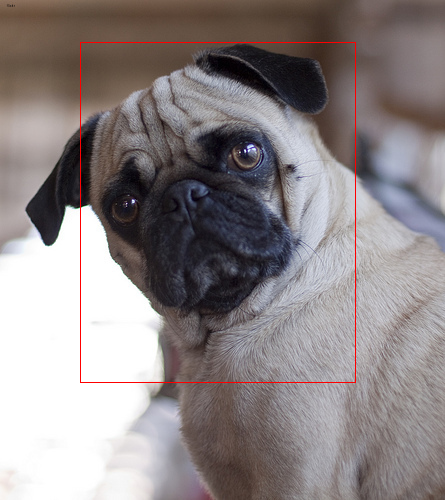




Prediction: english_setter
Probability:  8%
Actual: maine_coon


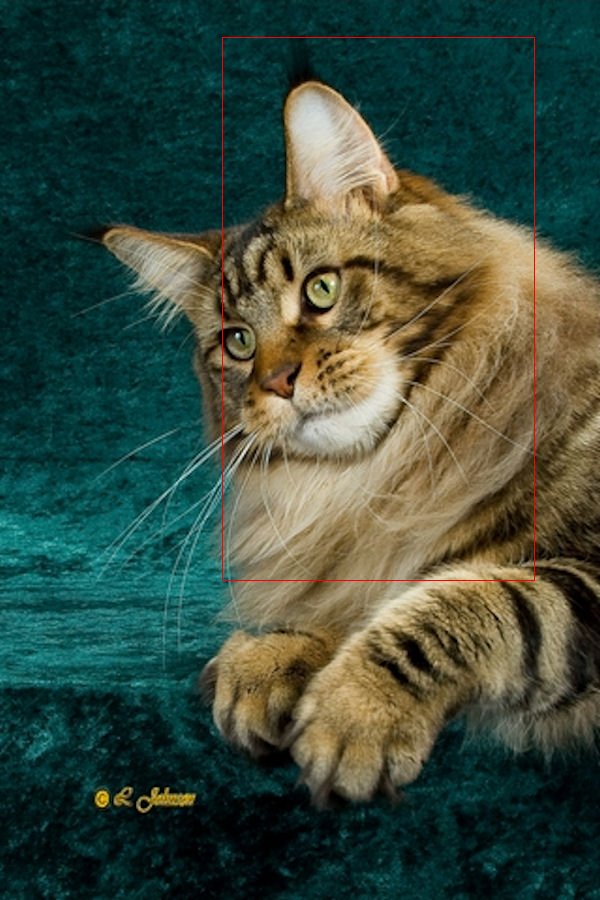




Prediction: wheaten_terrier
Probability:  3%
Actual: leonberger


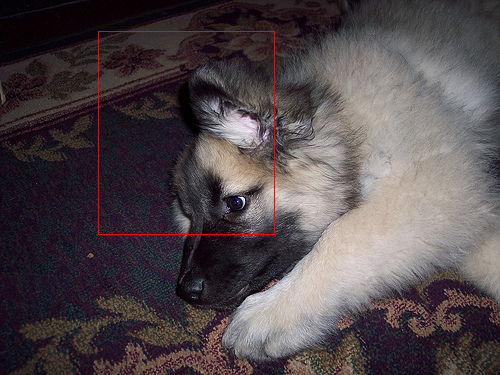




Prediction: english_setter
Probability:  5%
Actual: havanese


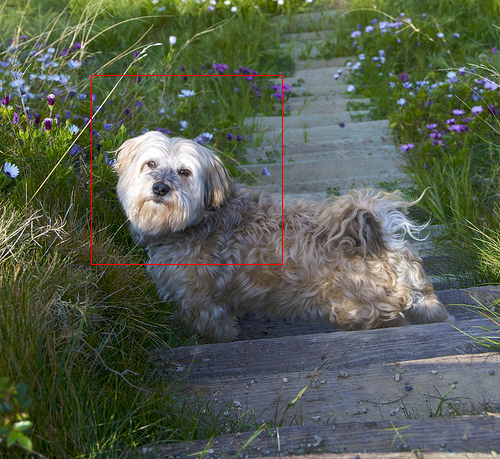




Prediction: english_setter
Probability:  4%
Actual: beagle


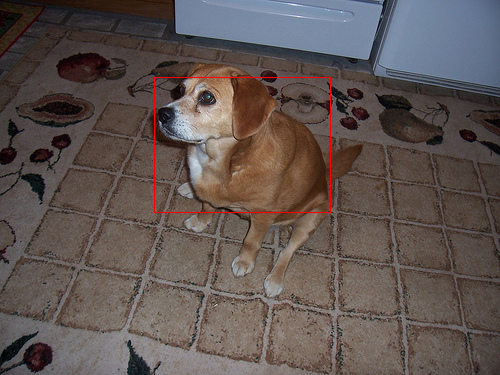

In [78]:
predict("model-0.51_cat_entropy.h5", 7)